# HW_04 Problem #2

<img src="assets/Hull-Robert-HW-04-af3bc12d.png" width="600" />

### This Code was written by Robert 'Quinn' Hull, and borrowed elements from several other resources:
* Understanding AdaBoost - https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe
* SKLearn - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* Machine Learning Mastery 
* SKLearn - https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-twoclass-py

<img src="assets/01_HW4-2.png" width="600" />


<img src="assets/02_AdaBoost_PC_02.png" width="600" />


<img src="assets/Screen Shot 2021-03-28 at 1.45.10 PM.png" width="600" />

### AdaBoosting

Pseudocode
  * for t=1 to T:
    * 1) execute a weaklearn hypothesis (ht)
      * set generic classifier, c = Cart(max_depth=4)
      * set indices of sample to train, idx = rsample(D, len(D))
      * Take subset of x and get labels, xt, yt = X[idx], y[idx]
      * create hypothesis, h[t] = c.fit(xt, yt)
    * 2) calculate the error (Et)
    * 3) update change parameter
    * 4) reset weights

  

### Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

### Create Data Sets

In [2]:
# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))
y[(y == 0)] = -1 # reset '0' classes to -1

## AdaBoost

### resample

In [3]:
def random(M_in, p_pdf):
  '''
  M_in : the number of samples
  p_pdf : a probability distribution (not cumulative)
  '''
  p_cdf = np.cumsum(p_pdf)
  output = np.zeros(M_in)
  for m in range(M_in): # loop through all elements in array
      p_in = np.random.uniform(0,1) # generate a random probability
      p_i = np.where(p_cdf >= p_in)[0][0] # extract first index of condition
      output[m] = p_i # randomly generate a number in probability interview
  return output


### WeakLearn

In [4]:
def weaklearn(H, X, y, D):
  '''
  H : Hypothesis Class
  D : Weight Distribution
  X, y : Dataset
  '''
  # set generic classifier
  c = H
  # get indices of samples to train
  idx = random(M_in=len(D), p_pdf=D).astype(np.int16)
  # take subset of x and get labels
  xt, yt = X[idx], y[idx]
  # create hypothesis
  ht = c.fit(xt, yt)
  return ht



### Error

In [5]:
def Errort(D,ht,X,y):
  '''
  D : distribution of weights
  ht : weak learning classifier 
  X : array of X values (data set)
  y : array of y values (data set)
  '''
  err_t = 0
  for i in range(len(D)):
    # print((ht.predict([X[i]]) != [y[i]]))
    err_i = D[i]*(ht.predict([X[i]]) != [y[i]])
    err_t = err_t + err_i
  
  return err_t

### Adaboost Code - homegrown training

In [6]:
# Globals
T = 50 # number of rounds
depth = 50 # number of estimators
H = DecisionTreeClassifier(max_depth=depth) # h is a classifier int he hypothesis class H, H is a generic tree classifier
n = len(y) # number of samples in data set
N_arr = np.arange(0,n,1) # an array of the different indexes


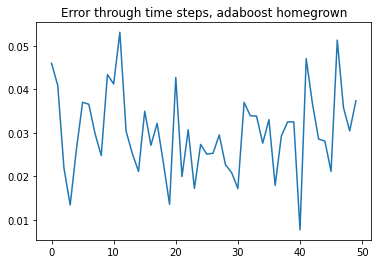

In [7]:
err_list = [] # for keeping track of errors
Dt = np.ones(n)*(1/n) # initializing weights, as equal to 1 / number of samples. Distribution always sums to 1
# print(Dt.sum())
for t in range(T):
  # generate hypothesis
  ht = weaklearn(H=H,X=X,y=y,D=Dt)
  # print(ht)

  # calculate error
  err_t = Errort(D=Dt,ht=ht,X=X,y=y)
  err_list.append(err_t)
  # print('error is', err_t)

  # calculate update parameter - low error, high alpha
  alpha_t = 0.5*np.log((1-err_t)/err_t)
  # print('alpha is', alpha_t)

  # calculate norm constant - a function of the error, according to lecture notes
  Zt = 2*np.sqrt(err_t*(1-err_t))
  # print(Zt)

  # update weights
  Dt = (Dt / Zt) * np.exp(-alpha_t*ht.predict(X)*y)
  # print('Weights summed to', Dt.sum())

plt.plot(np.arange(0,T,1),err_list)
plt.title('Error through time steps, adaboost homegrown')
plt.show()

## TESTING: Adaboost Code - homegrown

Text(0.5, 1.0, 'Decision Boundary for homegrown implementation')

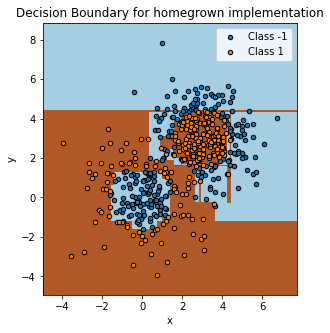

In [9]:
y[(y == 0)] = -1

ht.fit(X,y)

plot_step = 0.02

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = ht.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i in range(-1,2,2):
    # print(i)
    idx = np.where(y == i)
    # print(idx)
    plt.scatter(X[idx, 0], X[idx, 1],
                cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % str(i))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary for homegrown implementation')


## TESTING: Adaboost - From SKLearn

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Decision Boundary For Sklearn implementation')

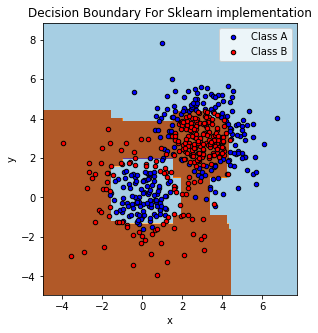

In [10]:
print(__doc__)

# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

y[(y == -1)] = 0

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=depth)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary For Sklearn implementation')
